In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [4]:
# load the data
fluxgateKennlinienAll = np.loadtxt('data/Spulenkonstante.lvm')

# select the data which its output voltage is between -10 and +10 volt
fluxgateKennlinien = fluxgateKennlinienAll[np.where(fluxgateKennlinienAll[:,1] <= 10)]
fluxgateKennlinien = fluxgateKennlinien[np.where(fluxgateKennlinien[:,1] >= -10)]
dfFluxgateKennlinien=pd.DataFrame({'x_Strom': fluxgateKennlinien[:,0],
                                   'y_Ausgangsspannung': fluxgateKennlinien[:,1]})

In [5]:
# define the linear regression model and fit the model with selected data
lrModel = LinearRegression()
x = dfFluxgateKennlinien['x_Strom'].values.reshape(-1, 1)
y = dfFluxgateKennlinien['y_Ausgangsspannung'].values.reshape(-1, 1)
lrModel.fit(x,y)

print('model score: ', lrModel.score(x, y))
print('coefficient: ', lrModel.coef_ )
print('intercept: ', lrModel.intercept_)

('model score: ', 0.9999999735889319)
('coefficient: ', array([[-0.09685204]]))
('intercept: ', array([-0.00815395]))


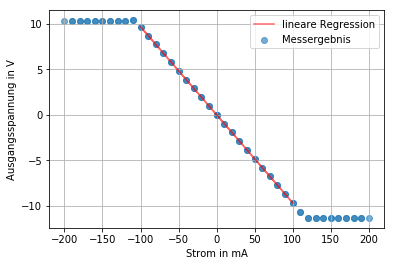

In [6]:
plt.grid()
# plot the original data as blue points
plt.scatter(fluxgateKennlinienAll[:,0], fluxgateKennlinienAll[:,1], alpha=0.6, label = "Messergebnis")

# plot the data from fitted model as red line
predicts = lrModel.predict(x)
plt.plot(x, predicts, color = 'r', alpha = 0.6, label = "lineare Regression")


plt.xlabel('Strom in mA')
plt.ylabel('Ausgangsspannung in V')
plt.legend(loc='upper right')
plt.savefig('output/Fluxgate_Kennlinien.eps', format = 'eps', dpi = 100)
plt.show()